# Apprentissage supervisé : Feature engineering et Classification

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving credit_scoring.csv to credit_scoring.csv
User uploaded file "credit_scoring.csv" with length 292421 bytes


In [0]:
import pandas as pd
from IPython.display import display

data = pd.read_csv("credit_scoring.csv", sep=';')
display(data)

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1
5,1.0,0.0,60.0,36.0,0.0,1.0,0.0,75.0,214.0,3500.0,0.0,650.0,1645.0,1
6,29.0,0.0,60.0,44.0,0.0,1.0,0.0,75.0,125.0,10000.0,0.0,1600.0,1800.0,1
7,9.0,1.0,12.0,27.0,1.0,1.0,0.0,35.0,80.0,0.0,0.0,200.0,1093.0,1
8,0.0,0.0,60.0,32.0,0.0,1.0,1.0,90.0,107.0,15000.0,0.0,1200.0,1957.0,1
9,0.0,1.0,48.0,41.0,0.0,1.0,1.0,90.0,80.0,0.0,0.0,1200.0,1468.0,0


(4375, 13)
------------
(4375,)
------------
(array([1216.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
       3159.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)


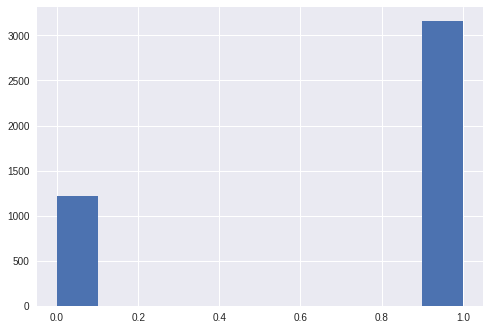

In [0]:
import matplotlib.pyplot as plt
car = data.iloc[:,:-1].values
pre = data.iloc[:,-1].values
print(car.shape)
print("------------")
print(pre.shape)
print("------------")
print(plt.hist(pre))

from sklearn.model_selection  import train_test_split
car_train, car_test, pre_train, pre_test = train_test_split(car,pre,test_size=0.5, random_state =0)

Dans cette section, nous voulons créer un système de prédiction pour la variable "status" à partir des treize variables caractéristiques. L'histogramme indique une forte présence des gens avec un état positif comparé à ceux dont l'état est négatif. Afin de minimiser le biais, nous allons procéder à une séparation de la base en une base de test, et en une autre d'apprentissage.

In [0]:

def fonc(car_train, car_test , pre_train , pre_test) : 

  from sklearn.metrics import accuracy_score 
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import classification_report, confusion_matrix  
  from sklearn.neighbors import KNeighborsClassifier
  
  #Implémentation de l'arbre de décision
  clf = DecisionTreeClassifier(random_state=1).fit(car_train, pre_train)
  pre_pred = clf.predict(car_test)
  #Affichage de la matrice de confusion et des mesures de précision, rappel, f1-score et support
  print(confusion_matrix(pre_test, pre_pred))  
  print(classification_report(pre_test, pre_pred)) 
  #Affichage de la mesure de justesse
  print('Accuracy: '+str("%0.2f" % accuracy_score(pre_test, pre_pred)))
  print('\n')
  #Implementation du classifieur KNN
  nbrs = KNeighborsClassifier(n_neighbors=5).fit(car_train,pre_train)
  pre_pred_knn = nbrs.predict(car_test) 

  print(confusion_matrix(pre_test, pre_pred_knn))  
  print(classification_report(pre_test, pre_pred_knn)) 
  
  print('Accuracy: '+str("%0.2f" % accuracy_score(pre_test, pre_pred_knn)))


fonc(car_train,car_test,pre_train,pre_test)

[[ 310  285]
 [ 317 1276]]
             precision    recall  f1-score   support

          0       0.49      0.52      0.51       595
          1       0.82      0.80      0.81      1593

avg / total       0.73      0.72      0.73      2188

Accuracy: 0.72


[[ 182  413]
 [ 213 1380]]
             precision    recall  f1-score   support

          0       0.46      0.31      0.37       595
          1       0.77      0.87      0.82      1593

avg / total       0.69      0.71      0.69      2188

Accuracy: 0.71


Les deux résultats sont comprables, avec des valeurs d'acurracy et de f1 score proche. Le modèle avec l'arbre de décision est légérement plue performant car la valeur du rappel et de la précision sont plus grande par rapport au modèle des k plus proches voisins. L'un des critères doit être choisi entre rappel et précision, mais cela dépend de la firme, soit elle veut minimiser ses pertes, en maximisant le rappet, en évitant ainsi les gens risqués, soit elle veut maximiser les gens auxquels elle veut attribuer les crédit soit l'utilisation du critère de la précision.

3.

In [0]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
sc_x = StandardScaler()
sc_x.fit(car_train)
car_norm = sc_x.transform(car)
car_train_norm= sc_x.transform(car_train)
car_test_norm = sc_x.transform(car_test)

#On scinde nos données en deux ensembles : ensemble d'apprentissage(training) et ensemble de test(testing) de même pour leurs classes résulat correspondantes
fonc(car_train_norm,car_test_norm,pre_train,pre_test)

[[ 308  287]
 [ 315 1278]]
             precision    recall  f1-score   support

          0       0.49      0.52      0.51       595
          1       0.82      0.80      0.81      1593

avg / total       0.73      0.72      0.73      2188

Accuracy: 0.72


[[ 288  307]
 [ 242 1351]]
             precision    recall  f1-score   support

          0       0.54      0.48      0.51       595
          1       0.81      0.85      0.83      1593

avg / total       0.74      0.75      0.74      2188

Accuracy: 0.75


Les modèles sont plus performants après normalisation, mais la conclusion reste la même avec ce qui a été obeservé dans la question précédente.

4.

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=13)
pca.fit(car_train_norm)         
car_pca = pca.transform(car_norm)

car_train_pca = pca.transform(car_train_norm)
car_test_pca = pca.transform(car_test_norm)

#On affiche la taille des composantes pca obtenues
car_pca = car_pca[:,:4]
print(car_pca.shape)

(4375, 4)


In [0]:
import numpy as np

print(car_train.shape)

#On ajoute les composantes pca aux attributs initiaux pour augmenter la performance de notre modèle

car_train_norm_pca = np.concatenate((car_train_norm,car_train_pca),axis=1)
car_test_norm_pca = np.concatenate((car_test_norm,car_test_pca),axis=1)
car_norm_pca = np.concatenate((car_norm,car_pca),axis=1)

print(car_train_pca.shape)
fonc(car_train_norm_pca,car_test_norm_pca,pre_train,pre_test)

(2187, 13)
(2187, 13)
[[ 297  298]
 [ 337 1256]]
             precision    recall  f1-score   support

          0       0.47      0.50      0.48       595
          1       0.81      0.79      0.80      1593

avg / total       0.72      0.71      0.71      2188

Accuracy: 0.71


[[ 288  307]
 [ 242 1351]]
             precision    recall  f1-score   support

          0       0.54      0.48      0.51       595
          1       0.81      0.85      0.83      1593

avg / total       0.74      0.75      0.74      2188

Accuracy: 0.75


5.

Avec l'utilisation du PCA, on remarque une dégradation lors de l'utilisation de l'arbre de décion des critères utilisés, alors que les valeurs restent un peu près les mêmes pour le modèle des k plus proches voisins.

Index(['Income', 'Price', 'Seniority', 'Amount', 'Age', 'Assets', 'Records',
       'Expenses', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


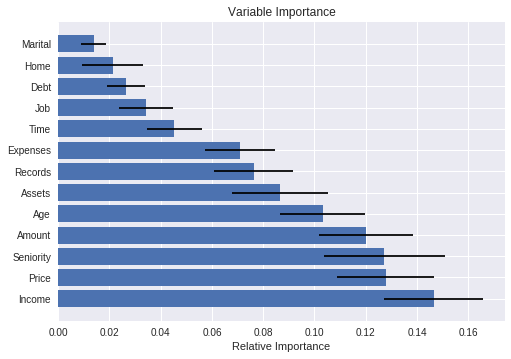

In [0]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(car_train_norm, pre_train)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features = data.columns[:13]
print(features[sorted_idx])
padding = np.arange(car_train_norm.size/len(car_train_norm)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

Une vue générale sur les critères les plus importants lors de l'attribution d'un crédit, le revenu de l'individu joue le rôle centrale, puis viens les autres critères.

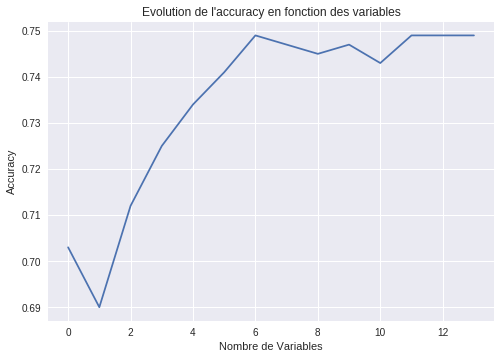

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier(n_neighbors=5)
scores=np.zeros(car_train_norm.shape[1]+1)
for f in np.arange(0, car_train_norm.shape[1]+1):
  X1_f = car_train_norm[:,sorted_idx[:f+1]]
  X2_f = car_test_norm[:,sorted_idx[:f+1]]
  KNN.fit(X1_f,pre_train)
  YKNN=KNN.predict(X2_f)
  scores[f]=np.round(accuracy_score(pre_test,YKNN),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

Les performances augmentent lorsqu'on ajoute les variables, mais après avoir choisi six variables l'Accuracy reste un peu près constante.

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
acc_scorer = make_scorer(accuracy_score)
clfk = KNeighborsClassifier()

parametersk = {'n_neighbors':[1,10,100,1000]}
clfk= KNeighborsClassifier()
clfk = GridSearchCV(clfk, parametersk , scoring=acc_scorer)
clfk = clfk.fit(car_train_norm, pre_train)

print(clfk.best_estimator_)

print("---------------------")

from sklearn.tree import DecisionTreeClassifier

parameterst = {'criterion':["gini","entropy"],"splitter":["best","random"],"random_state":[1,10,100,1000]}
clft= DecisionTreeClassifier()
clft = GridSearchCV(clft, parameterst, scoring=acc_scorer)
clft = clft.fit(car_train_norm, pre_train)

print(clft.best_estimator_)
    

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')
---------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')


Les valeurs à chosir sont 10 n_neighbors pour le modèle k plus proches voisins, et 100  pour l'arbre de décision. Il faut choisr des multiple de 10 afin de trouver plus rapidement les bonnes valeurs. Il s'agit d'une bonne pratique afin de minimiser le temps de l'exécution du programme.

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import FeatureUnion 
pipeline = Pipeline(memory=None,steps=[
    ('std', StandardScaler()),
    ('ftu', FeatureUnion( [ ('std', StandardScaler()) , ('pca',PCA(0.75)) ] )), 
    ('clf', DecisionTreeClassifier())] )


pipeline.fit(car_train, pre_train).predict(car_test)

array([1, 1, 0, ..., 0, 0, 0])

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import FeatureUnion 
pipeline = Pipeline(memory=None,steps=[
    ('std', StandardScaler()),
    ('ftu', FeatureUnion( [ ('std', DecisionTreeClassifier(random_state=1)) , ('pca',PCA(0.75)) ] )), 
    ('clf', DecisionTreeClassifier())] )


pipeline.fit(car_train, pre_train).predict(car_test)

La pipline permet de minimiser le travail, en utilisant une seule ligne pour exécuter le programme, le résultat obtenu est ensuite utilisé pour faire une prédiction.

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans, MiniBatchKMeans 
from sklearn.mixture import GaussianMixture 
from sklearn.tree import DecisionTreeClassifier #cart, id3 and decision stump (1 lvl tree)
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier #bagging, RF and adaboost
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, precision_score, accuracy_score, cohen_kappa_score, make_scorer
import time

auc_scorer=make_scorer(roc_auc_score)
acc_scorer=make_scorer(accuracy_score)
precision_scorer=make_scorer(precision_score)
kappa_scorer=make_scorer(cohen_kappa_score)

clfs = {
    #NaiveBayesSimple
    'NBayes': GaussianNB(),
    #Un arbre CART
    'CART': tree.DecisionTreeClassifier(),
    #Un arbre ID3
    'ID3': DecisionTreeClassifier(criterion = "entropy"),
    #MultilayerPerceptron à deux couches de tailles respectives 20 et 10
    'MLP': MLPClassifier(hidden_layer_sizes=(20,10),max_iter=1000),
    #Random Forest avec 50 classifieurs
    'RF': RandomForestClassifier(n_estimators=50),
    #k-plus-proches-voisins avec k=5
    'KNN': KNeighborsClassifier(n_neighbors=5),
    #Bagging avec 50 classifieurs
    'Bagging': BaggingClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50),
    #AdaBoost avec 50 classifieurs 
    'Adaboost_depth1':AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50),
    'Adaboost_depth2':AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=50)
}



def run_classifiers(clfs, X, Y):
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    for i in clfs:
        init_time = time.time()
        clf = clfs[i]
        clf = clf.fit(X, Y)
        cv_acc = cross_val_score(clf, X, Y, cv=kf)
        kappa_scores=cross_val_score(estimator=clf,X=X,y=Y,cv=kf,scoring=auc_scorer)
        auc_scores= cross_val_score(estimator=clf,X=X,y=Y,cv=kf,scoring=kappa_scorer)
        algo_time = time.time() - init_time
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))
        print("kappa for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(kappa_scores), np.std(kappa_scores)))
        print("AUC for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(auc_scores), np.std(auc_scores)))        
        print("execution time is: %s seconds" % algo_time)
        print('\n')

Cette fonction fait intervenir la plupart des algorithmes machine learning.

#II. Apprentissage supervisé : Données hétérogènes

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving credit.data to credit.data
User uploaded file "credit.data" with length 30205 bytes


In [0]:
import pandas as pd
from IPython.display import display

base = pd.read_csv('./credit.data', header=None, sep='\t')
data = base.values
X, Y = data[:,:-1], data[:, -1]

display(base)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52,1442,+


(array([299.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 367.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)


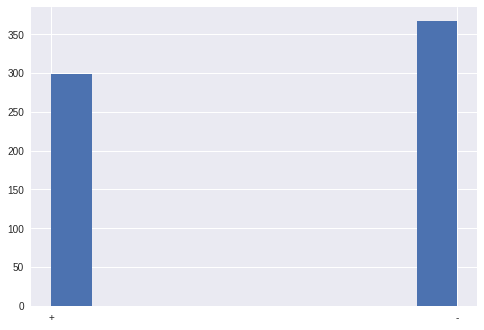

In [0]:
import numpy as np
base=base.replace('?', np.nan)
nbase = base[[1,2,7,10,13,14,15]]
nbase = nbase.dropna()
nbase = nbase.values
X_n,Y_n=nbase[:,:-1],nbase[:,-1]
X_n= X_n.astype(float)
X_n.shape
import matplotlib.pyplot as plt
print(plt.hist(Y_n))

Les données sont comparables, et les valeurs psotifs et négatifs sont presques les mêmes.

In [0]:
Y_n = np.where(Y_n=='+',1,0)
print(Y_n)



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [0]:
from sklearn.preprocessing import StandardScaler
X_c = StandardScaler().fit_transform(X_n)
run_classifiers(clfs, X_c, Y_n)

Accuracy for NBayes is: 0.716 +/- 0.050
kappa for NBayes is: 0.690 +/- 0.033
AUC for NBayes is: 0.398 +/- 0.077
execution time is: 0.04902315139770508 seconds


Accuracy for CART is: 0.718 +/- 0.052
kappa for CART is: 0.729 +/- 0.048
AUC for CART is: 0.434 +/- 0.095
execution time is: 0.09844326972961426 seconds


Accuracy for ID3 is: 0.731 +/- 0.044
kappa for ID3 is: 0.729 +/- 0.048
AUC for ID3 is: 0.445 +/- 0.103
execution time is: 0.14084410667419434 seconds


Accuracy for MLP is: 0.793 +/- 0.036
kappa for MLP is: 0.767 +/- 0.045
AUC for MLP is: 0.529 +/- 0.072
execution time is: 29.01479458808899 seconds


Accuracy for RF is: 0.785 +/- 0.052
kappa for RF is: 0.776 +/- 0.046
AUC for RF is: 0.562 +/- 0.105
execution time is: 2.8324334621429443 seconds


Accuracy for KNN is: 0.745 +/- 0.062
kappa for KNN is: 0.734 +/- 0.058
AUC for KNN is: 0.474 +/- 0.117
execution time is: 0.06991386413574219 seconds


Accuracy for Bagging is: 0.743 +/- 0.064
kappa for Bagging is: 0.723 +/- 0.052
AUC

On peut remarquer de faibles valeurs pour les mesures AUC et accuracy par rapport aux autres jeu de données. Cela peut être expliqué par un très grand nombre d'instance et peu d'attributs ce qui peut induire à un manque de relation pertinentes entres les attributs entrants et les sorties outputs .

On remarque aussi que la méthode MLP ( MultilayerPerceptron ) prend considérablement plus de temps que les autres modèles prédictifs vue le grand nombre d'itérations executées.

In [0]:
from sklearn.decomposition import PCA

pca = PCA(0.75)
pca.fit(X_c)
X_t = pca.transform(X_c)
print(pca.explained_variance_ratio_)
pca_1 = pca.components_[0]
pca_2 = pca.components_[1]
pca_3 = pca.components_[1]
pca_4 = pca.components_[1]
print(pca_1)
print(pca_2)
print(pca_3)
print(pca_4)
print('-----------------------')
print(X_c)
print('-----------------------')
print(X_t)


[0.32303239 0.17812337 0.1624939  0.13241474]
[ 0.45499012  0.47793667  0.53532047  0.45612324 -0.23760746  0.11613271]
[ 0.07582484 -0.06039093  0.12243534  0.01486247  0.67874305  0.71742602]
[ 0.07582484 -0.06039093  0.12243534  0.01486247  0.67874305  0.71742602]
[ 0.07582484 -0.06039093  0.12243534  0.01486247  0.67874305  0.71742602]
-----------------------
[[-0.06204687 -0.9593182  -0.29067118 -0.2962713   0.11604602 -0.19206984]
 [ 2.27524482 -0.06759466  0.24444227  0.71873224 -0.81188397 -0.08435822]
 [-0.59347849 -0.85934919 -0.21593467 -0.49927201  0.57125695 -0.03357988]
 ...
 [-0.53051266  1.73984498 -0.06646163 -0.2962713   0.10437394 -0.1918775 ]
 [-1.14589873 -0.9183309  -0.65239591 -0.49927201  0.57125695 -0.0478132 ]
 [ 0.28804316 -0.2845274   1.81390909 -0.49927201 -1.06283359 -0.19206984]]
-----------------------
[[-0.82734151 -0.0457928  -0.41501095 -0.08927876]
 [ 1.64470632 -0.39436869 -0.76993872 -0.84593745]
 [-1.16369979  0.33668363 -0.29212106  0.12123701]
 

In [0]:
data_concat=np.concatenate((X_c,X_t),axis=1)
answer_data_concat=run_classifiers(clfs, data_concat, Y_n)

Accuracy for NBayes is: 0.710 +/- 0.047
kappa for NBayes is: 0.686 +/- 0.034
AUC for NBayes is: 0.387 +/- 0.076
execution time is: 0.05148720741271973 seconds


Accuracy for CART is: 0.706 +/- 0.058
kappa for CART is: 0.698 +/- 0.062
AUC for CART is: 0.375 +/- 0.132
execution time is: 0.1511521339416504 seconds


Accuracy for ID3 is: 0.738 +/- 0.068
kappa for ID3 is: 0.719 +/- 0.072
AUC for ID3 is: 0.428 +/- 0.119
execution time is: 0.25340843200683594 seconds


Accuracy for MLP is: 0.767 +/- 0.030
kappa for MLP is: 0.773 +/- 0.046
AUC for MLP is: 0.556 +/- 0.057
execution time is: 27.58360528945923 seconds


Accuracy for RF is: 0.788 +/- 0.057
kappa for RF is: 0.764 +/- 0.050
AUC for RF is: 0.555 +/- 0.119
execution time is: 3.198848009109497 seconds


Accuracy for KNN is: 0.734 +/- 0.054
kappa for KNN is: 0.723 +/- 0.048
AUC for KNN is: 0.452 +/- 0.099
execution time is: 0.07542109489440918 seconds


Accuracy for Bagging is: 0.743 +/- 0.064
kappa for Bagging is: 0.723 +/- 0.052
AUC f

Après l'ajout des composantes PCA eux attributs initiaux, on remarque que les mesures se sont améliorer considérablement .

In [0]:
base = pd.read_csv('./credit.data', header=None, sep='\t')
data=base.values
X, Y= data[:, :-1], data[:, -1]

base_n = base[[1,2,7,10,13,14,15]]
base_n = base_n.values
X_n, Y_n = base_n[:, :-1], base_n[:, -1]

base_c = base[[0,3,4,5,6,8,9,11,12]]
base_c = base_c.values

#Imputer pour des variables catégoriques :
from sklearn.preprocessing import Imputer
X_cat = np.copy(base_c)
for col_id in range(0,9):
    unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True)
    X_cat[:, col_id] = val_idx
imp_cat = Imputer(missing_values=0, strategy='most_frequent')
X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])


#Imputer pour des variables numériques :
X_num = np.copy(X_n)
X_num[X_num == '?'] = np.nan
X_num = X_num.astype(float)
imp_num = Imputer(missing_values=np.nan, strategy='mean')
X_num = imp_num.fit_transform(X_num)

On remplace ici les valeurs manquantes qu'on a dans notre jeu de données, en imputant la valeur la plus fréquente pour les variables catégoriques et en imputant la moyenne pour les variables munériques.

In [0]:
from sklearn.preprocessing import OneHotEncoder
X_cat_bin = OneHotEncoder().fit_transform(X_cat).toarray()
X_num = StandardScaler().fit_transform(X_num)
s = np.concatenate((X_num, X_cat_bin), axis=1)
# Ajout des donnée des composantes PCA
pca=PCA(n_components=0.75)
s_pca=pca.fit_transform(s)
s_total=np.append(s,s_pca,axis=1)
run_classifiers(clfs,s_total,np.where(Y_n=="+",1,0))


Accuracy for NBayes is: 0.734 +/- 0.048
kappa for NBayes is: 0.706 +/- 0.062
AUC for NBayes is: 0.429 +/- 0.118
execution time is: 0.06654763221740723 seconds


Accuracy for CART is: 0.801 +/- 0.047
kappa for CART is: 0.803 +/- 0.065
AUC for CART is: 0.572 +/- 0.128
execution time is: 0.24431705474853516 seconds


Accuracy for ID3 is: 0.807 +/- 0.034
kappa for ID3 is: 0.802 +/- 0.050
AUC for ID3 is: 0.595 +/- 0.093
execution time is: 0.3808708190917969 seconds


Accuracy for MLP is: 0.863 +/- 0.045
kappa for MLP is: 0.855 +/- 0.055
AUC for MLP is: 0.714 +/- 0.101
execution time is: 12.614310264587402 seconds


Accuracy for RF is: 0.863 +/- 0.043
kappa for RF is: 0.862 +/- 0.037
AUC for RF is: 0.713 +/- 0.054
execution time is: 3.1260945796966553 seconds


Accuracy for KNN is: 0.834 +/- 0.046
kappa for KNN is: 0.827 +/- 0.046
AUC for KNN is: 0.659 +/- 0.092
execution time is: 0.1940932273864746 seconds


Accuracy for Bagging is: 0.856 +/- 0.044
kappa for Bagging is: 0.866 +/- 0.040
AUC 

In [0]:
On remarque une nette amélioration dans les mesures cela peut être expliqué par la diminution des valeurs manquantes et la normalisation de notre ensemble de données.

#III. Apprentissage supervisé sur des données textuelles : Feature engineering et Classification


#### Methode CountVectorize

Il s'agit de la méthode la plus simple que nous allons tester. Elle prend en compte seulement la fréquence des termes dans le corpus.

In [35]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving SMSSpamCollection.data to SMSSpamCollection.data
User uploaded file "SMSSpamCollection.data" with length 477907 bytes


In [36]:
from IPython.display import display

messages = pd.read_csv('./SMSSpamCollection.data',sep='\t',names=['labels','message'])
display(messages)

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
import time 
import numpy as np


vectorizer = CountVectorizer(max_features=300,stop_words='english')

messages2 = messages.values[:,0]
messages1 = messages.values[:,1]

X = vectorizer.fit_transform(messages1)

print ('Shape of Sparse Matrix: ', X.shape)
print ('Amount of Non-Zero occurences: ', X.nnz)
print ('sparsity: %.2f%%' % (100.0 * X.nnz /(X.shape[0] * X.shape[1])))
print ('\n')

run_classifiers(clfs, X.toarray(), np.where(messages2 == 'spam',1,0) )

Shape of Sparse Matrix:  (5572, 300)
Amount of Non-Zero occurences:  19727
sparsity: 1.18%


Accuracy for NBayes is: 0.592 +/- 0.017
kappa for NBayes is: 0.750 +/- 0.010
AUC for NBayes is: 0.221 +/- 0.022
execution time is: 1.028022289276123 seconds


Accuracy for CART is: 0.964 +/- 0.007
kappa for CART is: 0.920 +/- 0.020
AUC for CART is: 0.841 +/- 0.037
execution time is: 15.443431615829468 seconds


Accuracy for ID3 is: 0.964 +/- 0.008
kappa for ID3 is: 0.913 +/- 0.022
AUC for ID3 is: 0.833 +/- 0.043
execution time is: 14.690164804458618 seconds


Accuracy for MLP is: 0.979 +/- 0.006
kappa for MLP is: 0.942 +/- 0.013
AUC for MLP is: 0.903 +/- 0.024
execution time is: 136.56538796424866 seconds


Accuracy for RF is: 0.976 +/- 0.007
kappa for RF is: 0.938 +/- 0.013
AUC for RF is: 0.897 +/- 0.023
execution time is: 38.006879568099976 seconds


Accuracy for KNN is: 0.945 +/- 0.010
kappa for KNN is: 0.800 +/- 0.026
AUC for KNN is: 0.718 +/- 0.044
execution time is: 41.2643837928772 secon

Selon  la valeur de sparcité (1.18%). On déduit que la matrice de données à peu de valeurs nulles et donc est susceptible de nous donner un bon résultat.

Après l'implémentation des différents modèles prédictifs définis dans runclassifiers, on obtient pour chaque algorithme la moyenne, l'écart type pour le 10-cross-validation, ainsi que le temps d'exécution.

On remarque le modèle naif bayes est le moins adapté à notre modèle vue les valeurs de Kappa et d'AUC obtenues.

On remarque que les valeurs de mesures varient peut entre les autres algorithmes.

De plus, le temps d'exécution pour le MLP est très élevé par rapport aux autres.

#### Methode Tf Idf 
Cette méthode prend en compte les occurences des termes dans le corpus mais aussi au sein de chaque document, afin d'attribuer un meilleur score aux termes qui 'décrivent' et 'différencient' les documents entre eux. 

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)

run_classifiers(clfs, tfidf.toarray(), np.where(messages2 == 'spam',1,0))

Accuracy for NBayes is: 0.689 +/- 0.012
kappa for NBayes is: 0.800 +/- 0.010
AUC for NBayes is: 0.308 +/- 0.017
execution time is: 0.7476587295532227 seconds


Accuracy for CART is: 0.966 +/- 0.009
kappa for CART is: 0.922 +/- 0.022
AUC for CART is: 0.860 +/- 0.039
execution time is: 19.741997003555298 seconds


Accuracy for ID3 is: 0.967 +/- 0.006
kappa for ID3 is: 0.916 +/- 0.015
AUC for ID3 is: 0.850 +/- 0.030
execution time is: 19.52688956260681 seconds


Accuracy for MLP is: 0.977 +/- 0.006
kappa for MLP is: 0.941 +/- 0.017
AUC for MLP is: 0.898 +/- 0.024
execution time is: 154.88728785514832 seconds


Accuracy for RF is: 0.978 +/- 0.006
kappa for RF is: 0.936 +/- 0.017
AUC for RF is: 0.899 +/- 0.029
execution time is: 44.40400409698486 seconds


Accuracy for KNN is: 0.950 +/- 0.008
kappa for KNN is: 0.823 +/- 0.022
AUC for KNN is: 0.748 +/- 0.033
execution time is: 38.576815366744995 seconds


Accuracy for Bagging is: 0.891 +/- 0.012
kappa for Bagging is: 0.599 +/- 0.022
AUC for 

<b>• Avec Tf–idf term weighting:</b>
On remarque que la moyenne a augmenté par rapport à l'exécution précedente. De plus, l'écart type a bien dimunier pour KNN surtout.

#### Methode SVD

Il s'agit d'une méthode de réduction de dimension permet de projeter un document dans l'espace des concepts, i.e. de le traiter plus selon son sens.

In [40]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5)
truncSvd = svd.fit_transform(X)
run_classifiers(clfs, truncSvd, np.where(messages2 == 'spam',1,0))

Accuracy for NBayes is: 0.900 +/- 0.011
kappa for NBayes is: 0.767 +/- 0.027
AUC for NBayes is: 0.552 +/- 0.047
execution time is: 0.13023853302001953 seconds


Accuracy for CART is: 0.958 +/- 0.010
kappa for CART is: 0.907 +/- 0.029
AUC for CART is: 0.808 +/- 0.054
execution time is: 0.7814817428588867 seconds


Accuracy for ID3 is: 0.959 +/- 0.007
kappa for ID3 is: 0.910 +/- 0.022
AUC for ID3 is: 0.827 +/- 0.031
execution time is: 1.0350475311279297 seconds


Accuracy for MLP is: 0.947 +/- 0.012
kappa for MLP is: 0.871 +/- 0.031
AUC for MLP is: 0.765 +/- 0.043
execution time is: 48.92113995552063 seconds


Accuracy for RF is: 0.971 +/- 0.007
kappa for RF is: 0.925 +/- 0.024
AUC for RF is: 0.868 +/- 0.037
execution time is: 11.246390104293823 seconds


Accuracy for KNN is: 0.965 +/- 0.007
kappa for KNN is: 0.911 +/- 0.023
AUC for KNN is: 0.844 +/- 0.031
execution time is: 0.24875760078430176 seconds


Accuracy for Bagging is: 0.903 +/- 0.010
kappa for Bagging is: 0.843 +/- 0.014
AUC f

<b>• Avec TruncatedSVD:</b>
On remarque que la moyenne est semblable à l'exécution précedente. De plus, l'écart type a bien dimunier pour tous les algorithmes.
Pour Nbayes et KNN, la précision et le recall ont diminué. CART et RF ont toujours une précision et recall égaux à 1.

In [54]:
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.pipeline import Pipeline




pipeline = Pipeline(memory=None,steps=[
    ("vect",CountVectorizer(max_features=300,stop_words='english')),
    ('tft', TfidfTransformer()), 
    ('clf', DecisionTreeClassifier())] )


pipeline.fit(messages1,np.where(messages2 == 'spam',1,0)).predict(messages1)

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.pipeline import Pipeline




pipeline = Pipeline(memory=None,steps=[
    ("vect",CountVectorizer(max_features=300,stop_words='english')),
    ('svd', TruncatedSVD()), 
    ('clf', DecisionTreeClassifier())] )



pipeline.fit(messages1,np.where(messages2 == 'spam',1,0)).predict(messages1)

array([0, 0, 0, ..., 0, 0, 0])

Import du fichier "yelp-text-by-stars.csv"

In [41]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))


Saving yelp-text-by-stars.csv to yelp-text-by-stars (1).csv
User uploaded file "yelp-text-by-stars.csv" with length 29534412 bytes


In [50]:
import pandas as pd
from IPython.display import display

data = pd.read_csv("yelp-text-by-stars.csv", sep=';', encoding = "ISO-8859-1")
display(data)

,Stars,Text
0,1,Boarded my English Mastiff here over New Year'...
1,1,Another case of the Emperor's New Clothes. So...
2,1,Came on Valentine's Day night having pre-bough...
3,1,2Nd time eating here today.1st time was great ...
4,1,Allegiant is a disaster. Their fares are chea...
5,1,Saturday weekend after thanksgiving. Afternoon...
6,1,Very unimpressed by their pad Thai.. one of th...
7,1,I just called this North york Location at 416-...
8,1,So disappointed in the service that by the tim...
9,1,Service here is a complete clusterfuk. Very d...


In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
import time 
vectorizer = CountVectorizer(max_features=300,stop_words='english')

messages2 = data.values[:,0]
messages2I = messages2.astype('int')
messages1 = data.values[:,1]
y = label_binarize(messages2I, classes=[ 1, 2, 3 ,4, 5])
X = vectorizer.fit_transform(messages1)

print ('Shape of Sparse Matrix: ', X.shape)
print ('Amount of Non-Zero occurences: ', X.nnz)
print ('sparsity: %.2f%%' % (100.0 * X.nnz /(X.shape[0] * X.shape[1])))
print ('\n')

clf = OneVsRestClassifier(LinearSVC())


result= clf.fit(X,y).predict(X)
print(result)

Shape of Sparse Matrix:  (47371, 300)
Amount of Non-Zero occurences:  855286
sparsity: 6.02%


[[1 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]
